In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('/Users/surya/Documents/LPU/Semester-4/INT375 - Python/Data Sets/appleAppData.csv')
pd.set_option('display.max_columns', None)
df.head()

,App_Id,App_Name,AppStore_Url,Primary_Genre,Content_Rating,Size_Bytes,Required_IOS_Version,Released,Updated,Version,Price,Currency,Free,DeveloperId,Developer,Developer_Url,Developer_Website,Average_User_Rating,Reviews,Current_Version_Score,Current_Version_Reviews
0,com.hkbu.arc.apaper,A+ Paper Guide,https://apps.apple.com/us/app/a-paper-guide/id...,Education,4+,21993472,8,2017-09-28T03:02:41Z,2018-12-21T21:30:36Z,1.1.2,0.00,USD,True,1375410542,HKBU ARC,https://apps.apple.com/us/developer/hkbu-arc/i...,NaN,0.0,0,0.0,0
1,com.dmitriev.abooks,A-Books,https://apps.apple.com/us/app/a-books/id103157...,Book,4+,13135872,10,2015-08-31T19:31:32Z,2019-07-23T20:31:09Z,1.3,0.00,USD,True,1031572001,Roman Dmitriev,https://apps.apple.com/us/developer/roman-dmit...,NaN,5.0,1,5.0,1
2,no.terp.abooks,A-books,https://apps.apple.com/us/app/a-books/id145702...,Book,4+,21943296,9,2021-04-14T07:00:00Z,2021-05-30T21:08:54Z,1.3.1,0.00,USD,True,1457024163,Terp AS,https://apps.apple.com/us/developer/terp-as/id...,NaN,0.0,0,0.0,0
3,fr.antoinettefleur.Book1,A-F Book #1,https://apps.apple.com/us/app/a-f-book-1/id500...,Book,4+,81851392,8,2012-02-10T03:40:07Z,2019-10-29T12:40:37Z,1.2,2.99,USD,False,439568839,i-editeur.com,https://apps.apple.com/us/developer/i-editeur-...,NaN,0.0,0,0.0,0
4,com.imonstersoft.azdictionaryios,A-Z Synonyms Dictionary,https://apps.apple.com/us/app/a-z-synonyms-dic...,Reference,4+,64692224,9,2020-12-16T08:00:00Z,2020-12-18T21:36:11Z,1.0.1,0.00,USD,True,656731821,Ngov chiheang,https://apps.apple.com/us/developer/ngov-chihe...,http://imonstersoft.com,0.0,0,0.0,0


In [ ]:
# to get information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9998 entries, 0 to 9997
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   App_Id                   9998 non-null   object 
 1   App_Name                 9998 non-null   object 
 2   AppStore_Url             9998 non-null   object 
 3   Primary_Genre            9998 non-null   object 
 4   Content_Rating           9998 non-null   object 
 5   Size_Bytes               9998 non-null   int64  
 6   Required_IOS_Version     9998 non-null   object 
 7   Released                 9998 non-null   object 
 8   Updated                  9998 non-null   object 
 9   Version                  9998 non-null   object 
 10  Price                    9998 non-null   float64
 11  Currency                 9998 non-null   object 
 12  Free                     9998 non-null   bool   
 13  DeveloperId              9998 non-null   int64  
 14  Developer               

In [ ]:

# Exploring the data

In [ ]:
# data type of App_Id
print('The data type of App_Id:', df['App_Id'].dtype)

# checking for missing values in App_Id
print('Missing values in App_Id:', df['App_Id'].isnull().sum())

# checking duplicates in App_Id
print('Number of duplicates in App_Id:', df['App_Id'].duplicated().sum())

The data type of App_Id: object
Missing values in App_Id: 0
Number of duplicates in App_Id: 0


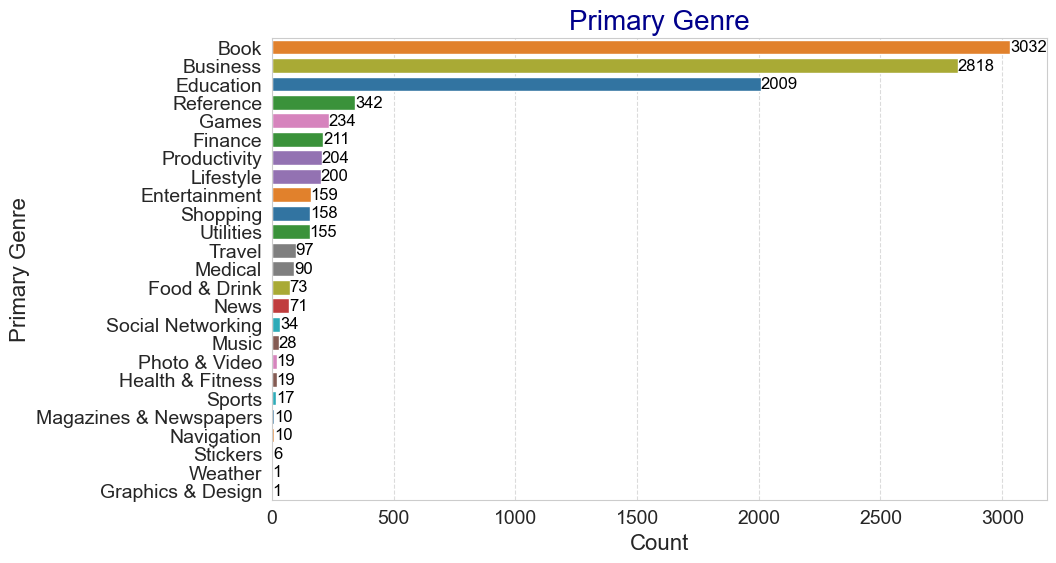

In [12]:
sns.set_style("whitegrid")
palette = sns.color_palette("tab10", n_colors=len(df['Primary_Genre'].unique()))

plt.figure(figsize=(10, 6))
plot = sns.countplot(
    data=df,
    y='Primary_Genre',
    hue='Primary_Genre',  # Category for color coding
    order=df['Primary_Genre'].value_counts().index,  
    palette=palette,
    legend=False # Disabling redudant legend
)

# Adding value annotations to the bars
for p in plot.patches:
    plot.annotate(f'{int(p.get_width())}', 
                (p.get_width(), p.get_y() + p.get_height() / 2), 
                ha='left', va='center', fontsize=12, color='black')

# Customising the plot
plt.title('Primary Genre', fontsize=20, color='darkblue', fontfamily='Arial')
plt.xlabel('Count', fontsize=16)
plt.ylabel('Primary Genre', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

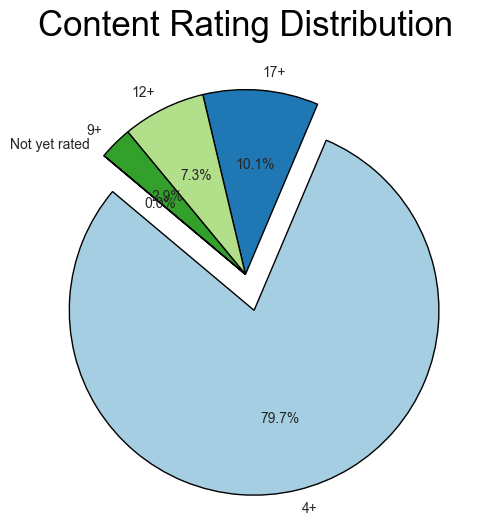

In [14]:
labels = ['4+', '17+', '12+', '9+', 'Not yet rated']
values = [980971, 124127, 89570, 35698, 10]

explode = [0.2, 0, 0, 0, 0]

plt.figure(figsize=(8, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%', explode=explode, startangle=140, 
        colors=plt.cm.Paired.colors, wedgeprops={'edgecolor': 'black'})

plt.title('Content Rating Distribution', fontsize=25, color='black')

plt.show()

In [20]:
# Price of Apps

# Data type of Price
print("The Data type of Price: ",df['Price'].dtype, "\n")

# Check for missing values
print('Number of missing values in Price:', df['Price'].isnull().sum(), "\n")

# Duplicate values in Price
print('Number of duplicates in Price:', df['Price'].duplicated().sum(), "\n")

# Mean (average) of Price
print('Mean of Price:', df['Price'].mean(), "\n")

# Median of Price
print('Median of Price:', df['Price'].median(), "\n")

# Mode of Price
print('Mode of Price:', df['Price'].mode(), "\n")

# Minimum value of Price
print('Minimum value of Price:', df['Price'].min(), "\n")

# Maximum value of Price
print('Maximum value of Price:', df['Price'].max())

The Data type of Price:  float64 

Number of missing values in Price: 0 

Number of duplicates in Price: 9945 

Mean of Price: 0.8256371274254852 

Median of Price: 0.0 

Mode of Price: 0    0.0
Name: Price, dtype: float64 

Minimum value of Price: 0.0 

Maximum value of Price: 499.99


In [27]:
# Rows where duplicates exist
df[df['Price'].duplicated()].head()

,App_Id,App_Name,AppStore_Url,Primary_Genre,Content_Rating,Size_Bytes,Required_IOS_Version,Released,Updated,Version,Price,Currency,Free,DeveloperId,Developer,Developer_Url,Developer_Website,Average_User_Rating,Reviews,Current_Version_Score,Current_Version_Reviews
1,com.dmitriev.abooks,A-Books,https://apps.apple.com/us/app/a-books/id103157...,Book,4+,13135872,10,2015-08-31T19:31:32Z,2019-07-23T20:31:09Z,1.3,0.0,USD,True,1031572001,Roman Dmitriev,https://apps.apple.com/us/developer/roman-dmit...,NaN,5.0,1,5.0,1
2,no.terp.abooks,A-books,https://apps.apple.com/us/app/a-books/id145702...,Book,4+,21943296,9,2021-04-14T07:00:00Z,2021-05-30T21:08:54Z,1.3.1,0.0,USD,True,1457024163,Terp AS,https://apps.apple.com/us/developer/terp-as/id...,NaN,0.0,0,0.0,0
4,com.imonstersoft.azdictionaryios,A-Z Synonyms Dictionary,https://apps.apple.com/us/app/a-z-synonyms-dic...,Reference,4+,64692224,9,2020-12-16T08:00:00Z,2020-12-18T21:36:11Z,1.0.1,0.0,USD,True,656731821,Ngov chiheang,https://apps.apple.com/us/developer/ngov-chihe...,http://imonstersoft.com,0.0,0,0.0,0
5,com.sm.apjkalam,A. P. J. Abdul Kalam Quotes olx Quotation Flip...,https://apps.apple.com/us/app/a-p-j-abdul-kala...,Book,4+,18073600,7.1,2016-09-17T03:28:31Z,2016-11-13T21:01:39Z,1.4,0.0,USD,True,1146730227,Shera Majid,https://apps.apple.com/us/developer/shera-maji...,NaN,0.0,0,0.0,0
6,com.chawlapublication.andhralr,A.P. Telangana Legal Reports,https://apps.apple.com/us/app/a-p-telangana-le...,Book,4+,105213952,8,2021-07-06T07:00:00Z,2021-07-19T20:20:47Z,1.3,0.0,USD,True,1228484249,Bhagatjit Singh,https://apps.apple.com/us/developer/bhagatjit-...,NaN,0.0,0,0.0,0


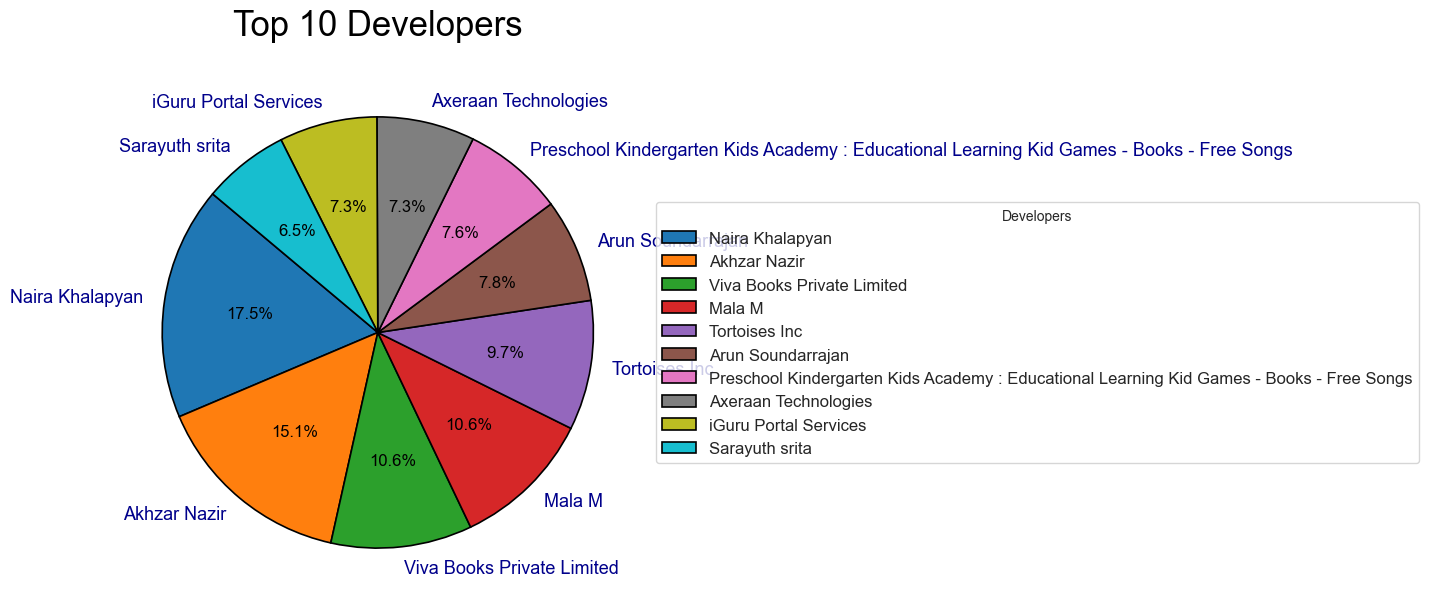

In [ ]:
top_10_developers = df['Developer'].value_counts().head(10)


colors = plt.cm.tab10.colors  

plt.figure(figsize=(9, 7))
wedges, texts, autotexts = plt.pie(
    top_10_developers, 
    labels=top_10_developers.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=colors, 
    wedgeprops={'edgecolor': 'black', 'linewidth': 1.2}, 
    textprops={'fontsize': 12, 'color': 'black'}
)

# Adjusting label positions
for text in texts:
    text.set_fontsize(13)
    text.set_color('darkblue')


plt.title('Top 10 Developers', fontsize=25, color='black', fontfamily='Arial', pad=20)
plt.legend(wedges, top_10_developers.index, title='Developers', loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

plt.show()